# **Decibel Model Main Code**

## 알집파일 해제코드(Optional)

In [1]:
import zipfile

zip_path_dB_counsel_5244 = './dB_counsel_5244.zip'
dir_path_dB_counsel_5244 = './dB_counel(5244)'

with zipfile.ZipFile(zip_path_dB_counsel_5244, 'r') as zip_ref:
    zip_ref.extractall(dir_path_dB_counsel_5244)

In [3]:
import os
count=0
for filename in os.listdir(dir_path_dB_counsel_5244):
    if filename.endswith(".npy"):
        count+=1

print(count)

5244


In [5]:
import zipfile

zip_path_dB_vp_4756 = './dB_vp_4756.zip'
dir_path_dB_vp_4756 = './dB_vp(4756)'

with zipfile.ZipFile(zip_path_dB_vp_4756, 'r') as zip_ref:
    zip_ref.extractall(dir_path_dB_vp_4756)

In [6]:
count=0
for filename in os.listdir(dir_path_dB_vp_4756):
    if filename.endswith(".npy"):
        count+=1

print(count)


4756


## 필요 Import문 및 Module

In [7]:
import os
import numpy as np
import glob
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (Conv1D, Dense, MaxPooling1D,
                                     BatchNormalization,
                                     GlobalAveragePooling1D,
                                     GlobalMaxPool1D,  Flatten, Dropout,
                                     Activation, Input)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import concatenate
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import keras.backend as K
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import seaborn as sns

2023-08-15 15:54:46.167570: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## load decibel data
 - reshape(-1, 1) : 불러온 numpy 데이터를 2차원으로 변환

 - -1은 나머지 차원을 자동으로 계산하라는 의미로, (n, 1) 형태의 2차원 배열로 변환하게 됨.

 - 지정된 폴더 내의 모든 numpy 데이터 파일을 불러와서 2차원 배열로 변환한 후, 이를 하나의 리스트에 저장

 - 1차원 numpy 배열을 .reshape(-1, 1)을 사용하여 2차원으로 변환하고 있다.

 - 이렇게 하면 각 데이터 포인트(데시벨 데이터의 각 값)는 하나의 특징만 가지는 `시퀀스`로 간주됨.

 - 이렇게 변환한 데이터를 Conv1D 레이어에 입력으로 제공하면, 레이어는 이 시퀀스 데이터의 지역적인 패턴을 학습하여 보이스피싱인지 일반 상담인지를 판단하는 데 도움이 되는 특징을 추출하게 된다.



 - 즉, 'councel decibel npy data'와 'voice phishing decibel npy data'는 각각 1차원의 numpy 배열.
 - 그 길이(즉, 데이터의 개수)는 157개
   - 한 개의 npy 파일에는 157개의 값을 가진 1차원 데이터가 저장되어 있다는 뜻

In [8]:
dir_path_dB_counsel_5244 = './dB_counel(5244)'
dir_path_dB_vp_4756 = './dB_vp(4756)'

In [9]:
vp_dB_data = [np.load(os.path.join(dir_path_dB_vp_4756, f)).reshape(-1,1) for f in os.listdir(dir_path_dB_vp_4756) if f.endswith('.npy')]
counsel_dB_data = [np.load(os.path.join(dir_path_dB_counsel_5244, f)).reshape(-1,1) for f in os.listdir(dir_path_dB_counsel_5244) if f.endswith('.npy')]

In [10]:
len(counsel_dB_data), len(vp_dB_data)

(5244, 4756)

In [11]:
counsel_dB_data[0].shape, vp_dB_data[0].shape

((157, 1), (157, 1))

In [12]:
counsel_dB_data[10]

array([[-18.232101  ],
       [-15.902384  ],
       [ -6.858389  ],
       [ -6.6664696 ],
       [ -6.546917  ],
       [ -4.814249  ],
       [ -4.3759346 ],
       [ -3.7516203 ],
       [ -3.217557  ],
       [ -3.3149452 ],
       [ -3.2007532 ],
       [ -2.0456486 ],
       [ -1.376215  ],
       [ -1.3520641 ],
       [ -1.6109905 ],
       [ -2.8434162 ],
       [ -5.5545006 ],
       [ -7.531845  ],
       [ -7.4465237 ],
       [ -3.8413658 ],
       [ -2.9866219 ],
       [ -2.2764359 ],
       [ -2.0477839 ],
       [ -2.3504295 ],
       [ -1.633872  ],
       [ -1.3516426 ],
       [ -1.4361267 ],
       [ -1.8153362 ],
       [ -2.6829796 ],
       [ -2.869357  ],
       [ -2.191742  ],
       [ -1.8994675 ],
       [ -1.9918985 ],
       [ -2.218501  ],
       [ -2.5322895 ],
       [ -2.2274208 ],
       [ -1.8723049 ],
       [ -1.7185974 ],
       [ -1.6672192 ],
       [ -2.065858  ],
       [ -2.8454762 ],
       [ -4.4059753 ],
       [ -7.320099  ],
       [-11

In [13]:
vp_dB_data[1000]

array([[-2.28602638e+01],
       [-1.71290245e+01],
       [-1.37985992e+01],
       [-8.42012787e+00],
       [-8.37342262e+00],
       [-8.10508347e+00],
       [-6.48706007e+00],
       [-3.71193171e+00],
       [-3.02810144e+00],
       [-2.96640062e+00],
       [-2.42997408e+00],
       [-2.30876398e+00],
       [-1.93544436e+00],
       [-1.39793158e+00],
       [-1.45934725e+00],
       [-1.43418455e+00],
       [-1.46233845e+00],
       [-2.01988268e+00],
       [-2.54032373e+00],
       [-4.26493597e+00],
       [-7.14050531e+00],
       [-7.01073122e+00],
       [-6.96289206e+00],
       [-7.07023287e+00],
       [-7.17206621e+00],
       [-6.90000772e+00],
       [-5.68410063e+00],
       [-4.86150599e+00],
       [-2.52407122e+00],
       [-6.45179749e-01],
       [-1.12782955e-01],
       [-4.76837158e-07],
       [-5.53294659e-01],
       [-2.40812445e+00],
       [-4.96675920e+00],
       [-6.65442896e+00],
       [-5.82404089e+00],
       [-5.25422907e+00],
       [-4.8

# **======================데이터 통계분석======================**

## Find outliers

 - 각 데이터 포인트별로 이상치의 수를 계산하고 그 평균값을 출력
 - 한 개의 데이터 포인트 (157, 1)에 대해서 평균적으로 몇 개의 이상치가 있나?

In [14]:
import numpy as np

def find_outliers(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

# 각 데이터 포인트마다 이상치의 개수를 계산합니다.
vp_outliers_count = [len(find_outliers(item)) for item in vp_dB_data]
counsel_outliers_count = [len(find_outliers(item)) for item in counsel_dB_data]

print(f"Average number of outliers per data point in VP decibel data: {np.mean(vp_outliers_count):.2f}")
print(f"Average number of outliers per data point in Counsel decibel data: {np.mean(counsel_outliers_count):.2f}")


Average number of outliers per data point in VP decibel data: 10.48
Average number of outliers per data point in Counsel decibel data: 16.13


- Voice Phishing (VP) decibel data:
  - 평균적으로 각 Voice Phishing 데이터 포인트마다 약 10.48개의 이상치가 있음을 의미합니다.
- Counsel decibel data:
  - 평균적으로 각 Counsel 데이터 포인트마다 약 6.62개의 이상치가 있음을 의미합니다.

## 각 데이터 세트의 데이터 포인트에 대한 분포도

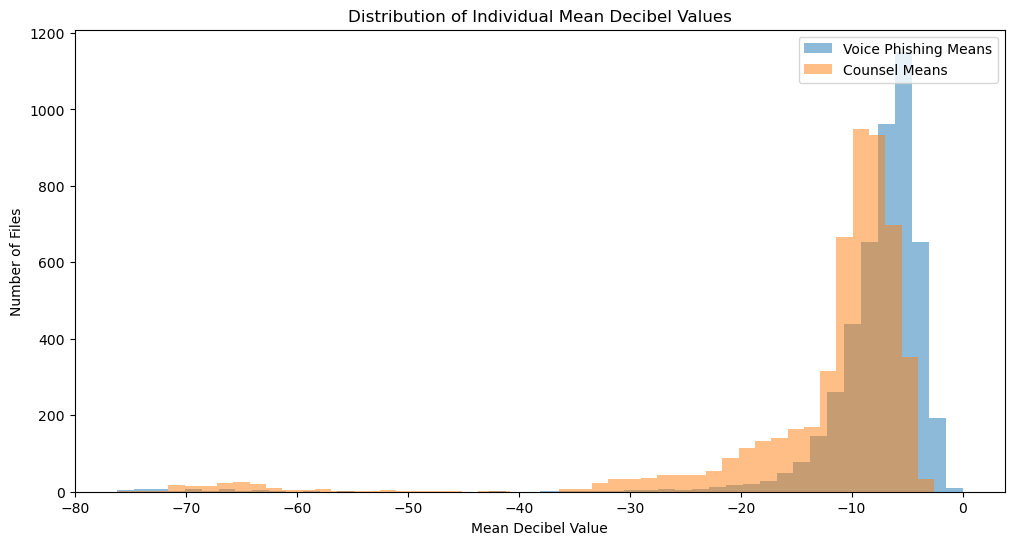

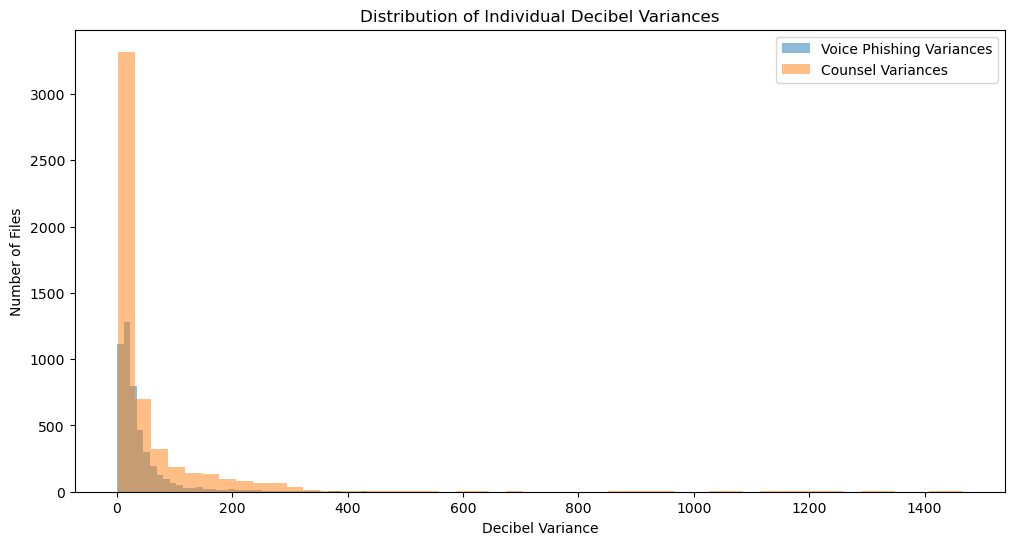

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# 각 데이터 포인트에 대한 평균과 분산을 계산하는 함수
def compute_individual_means_and_vars(data):
    means = [np.mean(item) for item in data]
    vars = [np.var(item) for item in data]
    return means, vars

# 각 데이터 포인트별 평균과 분산 계산
vp_means, vp_vars = compute_individual_means_and_vars(vp_dB_data)
counsel_means, counsel_vars = compute_individual_means_and_vars(counsel_dB_data)

# 평균의 히스토그램 그리기
plt.figure(figsize=(12, 6))
plt.hist(vp_means, bins=50, alpha=0.5, label='Voice Phishing Means')
plt.hist(counsel_means, bins=50, alpha=0.5, label='Counsel Means')
plt.xlabel('Mean Decibel Value')
plt.ylabel('Number of Files')
plt.title('Distribution of Individual Mean Decibel Values')
plt.legend(loc='upper right')
plt.show()

# 분산의 히스토그램 그리기
plt.figure(figsize=(12, 6))
plt.hist(vp_vars, bins=50, alpha=0.5, label='Voice Phishing Variances')
plt.hist(counsel_vars, bins=50, alpha=0.5, label='Counsel Variances')
plt.xlabel('Decibel Variance')
plt.ylabel('Number of Files')
plt.title('Distribution of Individual Decibel Variances')
plt.legend(loc='upper right')
plt.show()


## 각 데이터 포인트에 대해 왜도와 첨도를 계산하여 주어진 조건에 따라 정규성을 판단
 - 이 코드는 각 데이터 셋의 데이터 포인트의 왜도와 첨도를 계산하여 그 값이 0에 가까운지를 기준으로 데이터셋이 정규분포에 가까운지를 판단
 - 여기서는 왜도의 절댓값이 2 이하, 첨도의 절댓값이 7이하일대 정규성을 만족한다고 판단

In [16]:
from scipy import stats

def check_normality(data):
    skewness = stats.skew(data)
    kurtosis = stats.kurtosis(data)
    return abs(skewness) <= 2 and abs(kurtosis) <= 7

# 각 데이터 포인트에 대한 정규성 판단
vp_normality = [check_normality(item) for item in vp_dB_data]
counsel_normality = [check_normality(item) for item in counsel_dB_data]

# 정규성을 만족하는 데이터 포인트의 개수 계산
vp_normal_count = sum(vp_normality)
counsel_normal_count = sum(counsel_normality)

print(f"Voice Phishing data points satisfying normality: {vp_normal_count} out of {len(vp_dB_data)}")
print(f"Counsel data points satisfying normality: {counsel_normal_count} out of {len(counsel_dB_data)}")


Voice Phishing data points satisfying normality: [3690] out of 4756
Counsel data points satisfying normality: [4940] out of 5244


- Voice Phishing data points satisfying normality: [3690] out of 4756:
  - 총 4756개의 보이스 피싱 데이터 포인트 중에서 3690개의 데이터 포인트가 정규성을 만족한다는 의미입니다.
- Counsel data points satisfying normality: [4247] out of 4756:
  - 총 4756개의 일반상담 데이터 포인트 중에서 4247개의 데이터 포인트가 정규성을 만족한다는 의미입니다. 
  
- 이 결과를 통해 보이스 피싱 데이터의 약 77.6%와 일반상담 데이터의 약 89.3%가 주어진 조건에 따라 정규성을 만족하고 있음을 알 수 있습니다.

# ============================================================

## data labeling(decibel data)

 - 보이스피싱 데이터(vp_data)는 0으로, 상담 데이터(counsel_data)는 1로 라벨링 수행.
 - 이를 위해 리스트를 생성하는데, 리스트의 길이는 각 데이터의 개수(len(vp_data), len(counsel_data))와 동일함.
 - 모든 요소는 각 데이터에 해당하는 라벨 (0 또는 1)로 채워짐.

In [17]:
# Data labeling
vp_dB_labels = [0] * len(vp_dB_data) # Label voice phishing data as 0
counsel_dB_labels = [1] * len(counsel_dB_data) # Counseling data is labeled as 1

## combine decibel data

 - 이후, 보이스피싱 데이터와 상담 데이터를 하나의 리스트 x_data로 병합.
 - 각 데이터에 해당하는 라벨도 하나의 리스트 y_labels로 병합.
 - `+` 연산자는 리스트를 이어 붙이는 역할을 함.
 - 따라서 x_data는 모든 데이터를, y_labels는 모든 데이터에 대응하는 라벨을 순서대로 가지게 됨.
 - 이렇게 만든 x_data와 y_labels는 이후 모델 학습에 사용됨.

In [18]:
# Combine data and labels into one list
x_data_dB = vp_dB_data  + counsel_dB_data
y_labels_dB = vp_dB_labels + counsel_dB_labels

## 데이터 Padding (Optional)

 - pad_sequences는 시퀀스 데이터(여기서는 x_data)의 길이를 맞춰주는 함수.
 - 이 함수는 모든 시퀀스 데이터가 동일한 길이를 가지도록 0을 채워넣는 역할을 함.
 - 이때 `padding='post'`는 시퀀스 `뒤쪽`에 `0`을 채워넣는 것을 의미함.
 - `dtype='float32'`는 `0`의 데이터 타입을 `float32`로 지정하는 것을 의미함.

In [ ]:
# Pad sequences to the same length
x_data_padded = pad_sequences(x_data, padding='post', dtype='float32')

 - pad_sequences로 동일한 길이로 만든 x_data_padded와 라벨 데이터인 y_labels를 numpy 배열로 변환하는 코드.
 - `np.array` 함수는 주어진 데이터를 `numpy 배열`로 변환해줌.
 - 이렇게 `numpy` 배열로 변환한 이유는 이후에 사용할 기계학습 라이브러리가 주로 numpy 배열 형태의 데이터를 입력으로 받기 때문.
 - 따라서, `x_data_array`는 `입력 데이터`를, `y_labels_array`는 해당 데이터의 `라벨`을 각각 가지게 됨.
 - 이들은 모델 학습 및 평가에 사용됨.

In [ ]:
# Now you can safely convert to a single numpy array
x_data_array = np.array(x_data_padded)
y_labels_array = np.array(y_labels)

In [ ]:
x_data_array = np.array(x_data)
y_labels_array = np.array(y_labels)

In [ ]:
x_data_array.shape

In [ ]:
x_data_array_shape = x_data_array.shape

## Convert list to numpy arrays

In [19]:
# Convert lists to numpy arrays
x_data_dB = np.array(x_data_dB)
y_labels_dB = np.array(y_labels_dB)

## Data Split

In [20]:
x_data_dB.shape

(10000, 157, 1)

In [21]:
y_labels_dB.shape

(10000,)

## data splitting

In [22]:
from sklearn.model_selection import train_test_split

# First, split the dataset into a temporary training set and test set.
x_temp_dB, x_test_dB, y_temp_dB, y_test_dB = train_test_split(x_data_dB, y_labels_dB, test_size=1100, random_state=42, shuffle=True)

# Split the temporary training set into a final training set and a validation set.
x_train_dB, x_val_dB, y_train_dB, y_val_dB = train_test_split(x_temp_dB, y_temp_dB, test_size=1100, random_state=42, shuffle=True)

print(f"dB Train data shape: {x_train_dB.shape}")
print(f"dB Validation data shape: {x_val_dB.shape}")
print(f"dB Test data shape: {x_test_dB.shape}")

dB Train data shape: (7800, 157, 1)
dB Validation data shape: (1100, 157, 1)
dB Test data shape: (1100, 157, 1)


## 모델 layer 초기화

In [23]:
K.clear_session()

## Decibel Model Definition

In [24]:
# Create the Normalization layer
norm_layer = Normalization(axis=1)
# Adapt it to the data
norm_layer.adapt(x_train_dB)

# Define the input shape
inputs = Input(shape=(x_train_dB.shape[1], 1))
# Call it on the inputs
x = norm_layer(inputs)

# 첫번째 입력에 대한 Convolutional 레이어를 정의합니다.
x = Conv1D(32, 3, dilation_rate=1, padding='causal', activation='relu', name="Conv1D_1")(x)
x = Conv1D(64, 3, dilation_rate=2, padding='causal', activation='relu', name="Conv1D_2")(x)
x = Conv1D(128, 3, dilation_rate=4, padding='causal', activation='relu', name="Conv1D_3")(x)
x = Conv1D(128, 3, dilation_rate=8, padding='causal', activation='relu', name="Conv1D_4")(x)
x = Conv1D(256, 3, dilation_rate=16, padding='causal', activation='relu', name="Conv1D_5")(x)
x = Conv1D(512, 3, dilation_rate=32, padding='causal', activation='relu', name="Conv1D_6")(x)
x = GlobalAveragePooling1D()(x)

# Dense Layer
x = Dense(32, activation='relu')(x)
# Output Layer
outputs = Dense(1, activation='sigmoid')(x)

# Define the model
model = Model(inputs=inputs, outputs=outputs)

# Model summary
model.summary()

2023-08-15 15:55:15.575831: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-15 15:55:17.155007: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6635 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080, pci bus id: 0000:17:00.0, compute capability: 7.5
2023-08-15 15:55:17.155798: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 6534 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 2080, pci bus id: 0000:b3:00.0, compute capability: 7.5


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 157, 1)]          0         
                                                                 
 normalization (Normalizatio  (None, 157, 1)           315       
 n)                                                              
                                                                 
 Conv1D_1 (Conv1D)           (None, 157, 32)           128       
                                                                 
 Conv1D_2 (Conv1D)           (None, 157, 64)           6208      
                                                                 
 Conv1D_3 (Conv1D)           (None, 157, 128)          24704     
                                                                 
 Conv1D_4 (Conv1D)           (None, 157, 128)          49280     
                                                             

## Plotting model

In [25]:
# plot_model(model, show_shapes=True, show_layer_activations=True)

## Training Model with train data & Final Evaluatation with test data

In [26]:
# EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, mode='auto')

# ModelCheckpoint callback
model_checkpoint = ModelCheckpoint(
    '230809_decibel_model.h5',  # Path where to save the model
    monitor='val_accuracy',  # The metric to monitor
    verbose=1,  # Log info
    save_best_only=True,  # Only save the best model
    mode='max',  # Maximize val_accuracy
    overwrite=True
)

callbacks = [early_stopping, model_checkpoint]

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
history = model.fit(x_train_dB, y_train_dB,
                    validation_data=(x_val_dB, y_val_dB),
                    epochs=100, batch_size=64,
                    callbacks=callbacks) # Add the callbacks to the model fit method


Epoch 1/100


2023-08-15 15:55:24.950647: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8101
2023-08-15 15:55:26.534539: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f5ed1492710 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-08-15 15:55:26.534578: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 2080, Compute Capability 7.5
2023-08-15 15:55:26.534590: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (1): NVIDIA GeForce RTX 2080, Compute Capability 7.5
2023-08-15 15:55:26.541696: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-08-15 15:55:26.714090: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


122/122 [==============================] - ETA: 0s - loss: 0.5605 - accuracy: 0.7187
Epoch 1: val_accuracy improved from -inf to 0.77273, saving model to 230809_decibel_model.h5
122/122 [==============================] - 13s 56ms/step - loss: 0.5605 - accuracy: 0.7187 - val_loss: 0.4949 - val_accuracy: 0.7727
Epoch 2/100
122/122 [==============================] - ETA: 0s - loss: 0.4710 - accuracy: 0.7854
Epoch 2: val_accuracy improved from 0.77273 to 0.79455, saving model to 230809_decibel_model.h5
122/122 [==============================] - 3s 27ms/step - loss: 0.4710 - accuracy: 0.7854 - val_loss: 0.4319 - val_accuracy: 0.7945
Epoch 3/100
122/122 [==============================] - ETA: 0s - loss: 0.4145 - accuracy: 0.8112
Epoch 3: val_accuracy improved from 0.79455 to 0.80636, saving model to 230809_decibel_model.h5
122/122 [==============================] - 3s 25ms/step - loss: 0.4145 - accuracy: 0.8112 - val_loss: 0.4184 - val_accuracy: 0.8064
Epoch 4/100
122/122 [==================

## Plot Accuracy & Loss of train, validation data

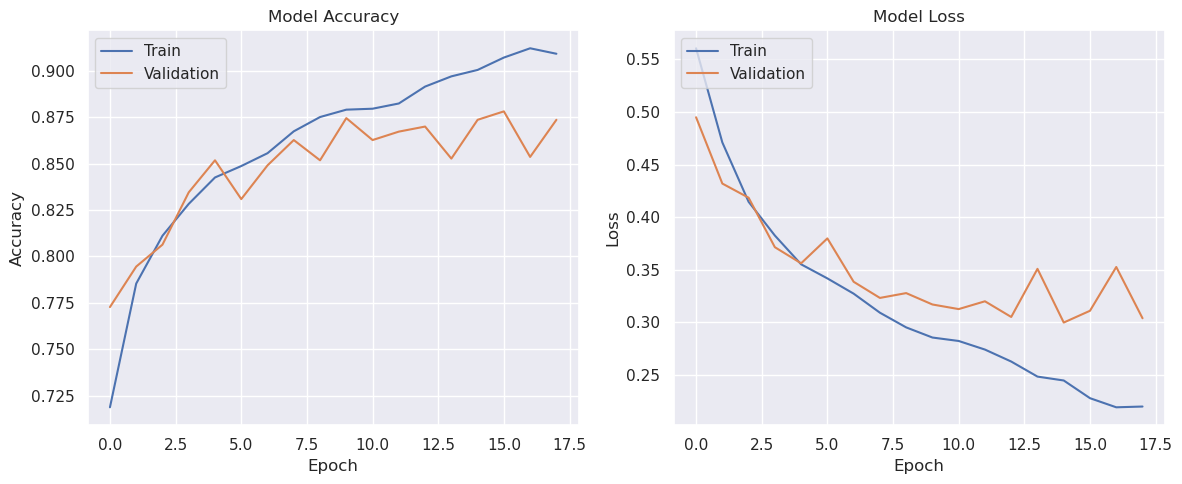

In [27]:
# seaborn 스타일 설정
sns.set()

# 그림 생성
plt.figure(figsize=(12,5))

# 훈련 및 검증 정확도 그리기
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# 훈련 및 검증 손실 값 그리기
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


## Best val accuracy model로 final evaluate

In [28]:
from tensorflow.keras.models import load_model

# Load the saved model
model_best = load_model('230809_decibel_model.h5')

# Evaluate the model using test data
test_loss, test_accuracy = model_best.evaluate(x_test_dB, y_test_dB)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


35/35 [==============================] - 1s 8ms/step - loss: 0.3119 - accuracy: 0.8573
Test Loss: 0.31190556287765503
Test Accuracy: 0.857272744178772


## draw confusion matrix

35/35 [==============================] - 0s 6ms/step


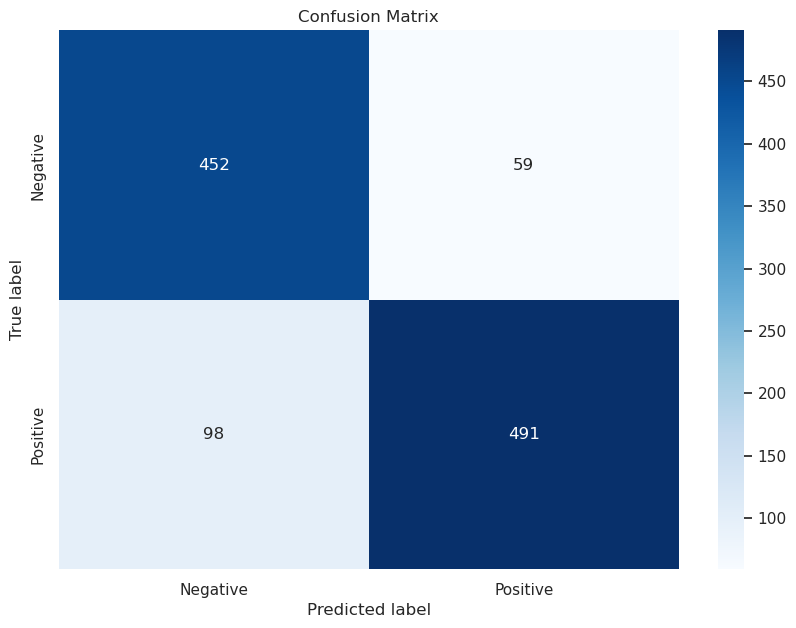

In [29]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming model is your trained model and X_test and y_test are your test data and labels:
y_pred = model_best.predict(x_test_dB)
y_pred = np.round(y_pred).flatten()  # flatten and round predictions to match label format

# Calculate the confusion matrix
cm = confusion_matrix(y_test_dB, y_pred)

# Create a DataFrame from the confusion matrix
# negative = 0 ; 보이스피싱범, positive = 1 ; 상담원
cm_df = pd.DataFrame(cm, index=['Negative', 'Positive'], columns=['Negative', 'Positive'])

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')  # 'd' stands for integer formatting
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


 - True Negative (왼쪽 위 셀): 보이스피싱이라고 예측하고 실제로 보이스피싱인 경우
 - False Positive (오른쪽 위 셀): 일반 상담이라고 예측하였지만 실제로는 보이스피싱인 경우
 - False Negative (왼쪽 아래 셀): 보이스피싱이라고 예측하였지만 실제로는 일반 상담인 경우
 - True Positive (오른쪽 아래 셀): 일반 상담이라고 예측하고 실제로 일반 상담인 경우

## 불러온 모델로 새로운 data에 대한 predict

In [30]:
# Load the saved model
model_best = load_model('230809_decibel_model.h5')

# 모델의 모든 레이어에 대한 정보를 출력합니다.
model_best.summary()

# 모델의 첫 번째 입력 레이어의 형상과 데이터 형식을 확인합니다.
input_shape = model_best.layers[0].input_shape
input_dtype = model_best.layers[0].dtype

print("Input Shape:", input_shape)
print("Input Data Type:", input_dtype)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 157, 1)]          0         
                                                                 
 normalization (Normalizatio  (None, 157, 1)           315       
 n)                                                              
                                                                 
 Conv1D_1 (Conv1D)           (None, 157, 32)           128       
                                                                 
 Conv1D_2 (Conv1D)           (None, 157, 64)           6208      
                                                                 
 Conv1D_3 (Conv1D)           (None, 157, 128)          24704     
                                                                 
 Conv1D_4 (Conv1D)           (None, 157, 128)          49280     
                                                             

## Real world data loading

In [31]:
import zipfile

zip_path_jisoo_vp_dB = './jisoo_vp_dB.zip'
dir_path_jisoo_vp_dB = './jisoo_vp_dB'

with zipfile.ZipFile(zip_path_jisoo_vp_dB, 'r') as zip_ref:
    zip_ref.extractall(dir_path_jisoo_vp_dB)

In [32]:
import os
import numpy as np

# test set upload
path = './jisoo_vp_dB/' #본인이 확인하고 싶은 데이터가 들어있는 폴더를 적어주세요
file_list = os.listdir(path)
file_list_pitch = [file for file in file_list if file.endswith('.npy')] 
print(file_list_pitch)
print(len(file_list_pitch))

['jisoo_dB (17).npy', 'jisoo_dB (48).npy', 'jisoo_dB (43).npy', 'jisoo_dB (45).npy', 'jisoo_dB (23).npy', 'jisoo_dB (35).npy', 'jisoo_dB (8).npy', 'jisoo_dB (31).npy', 'jisoo_dB (29).npy', 'jisoo_dB (42).npy', 'jisoo_dB (14).npy', 'jisoo_dB (55).npy', 'jisoo_dB (39).npy', 'jisoo_dB (15).npy', 'jisoo_dB (24).npy', 'jisoo_dB (3).npy', 'jisoo_dB (37).npy', 'jisoo_dB (36).npy', 'jisoo_dB (1).npy', 'jisoo_dB (16).npy', 'jisoo_dB (38).npy', 'jisoo_dB (12).npy', 'jisoo_dB (4).npy', 'jisoo_dB (9).npy', 'jisoo_dB (44).npy', 'jisoo_dB (33).npy', 'jisoo_dB (13).npy', 'jisoo_dB (5).npy', 'jisoo_dB (18).npy', 'jisoo_dB (21).npy', 'jisoo_dB (41).npy', 'jisoo_dB (54).npy', 'jisoo_dB (52).npy', 'jisoo_dB (34).npy', 'jisoo_dB (19).npy', 'jisoo_dB (50).npy', 'jisoo_dB (2).npy', 'jisoo_dB (56).npy', 'jisoo_dB (20).npy', 'jisoo_dB (30).npy', 'jisoo_dB (53).npy', 'jisoo_dB (26).npy', 'jisoo_dB (10).npy', 'jisoo_dB (7).npy', 'jisoo_dB (27).npy', 'jisoo_dB (25).npy', 'jisoo_dB (49).npy', 'jisoo_dB (51).npy',

## Predictions for chunks and save label to the list

In [33]:
import numpy as np

def preprocess_files(file_list_pitch):
    reshaped_files = []
    for file in file_list_pitch:
        data = np.load(path + file)
        reshaped_data = data.reshape(1, 157, 1)
        reshaped_files.append(reshaped_data)
    return np.vstack(reshaped_files).astype('float32')

def predict_with_model(model_best, file_list_pitch):
    data = preprocess_files(file_list_pitch)
    probabilities = model_best.predict(data)
    # 확률이 0.5 이상이면 1, 0.5 미만이면 0
    labels = [1 if prob[0] >= 0.5 else 0 for prob in probabilities]

    for idx, probability in enumerate(probabilities):
        class_0_prob = 1 - probability[0]
        class_1_prob = probability[0]
        
        print(f"=== File {idx+1} ===")
        print(f"Class 0 Probability: {class_0_prob:.20f}")
        print(f"Class 1 Probability: {class_1_prob:.20f}")
        print("Predicted Label:", labels[idx])
        print("=============================\n")

    return probabilities, labels

# Define model_best and file_list_pitch appropriately before calling predict_with_model

print("\n=== Predictions ===\n")
predictions, labels = predict_with_model(model_best, file_list_pitch)
print("Predicted Labels List:", labels)



=== Predictions ===

2/2 [==============================] - 0s 142ms/step
=== File 1 ===
Class 0 Probability: 0.98503603320568799973
Class 1 Probability: 0.01496396679431200027
Predicted Label: 0

=== File 2 ===
Class 0 Probability: 0.95743359625339508057
Class 1 Probability: 0.04256640374660491943
Predicted Label: 0

=== File 3 ===
Class 0 Probability: 0.82289417088031768799
Class 1 Probability: 0.17710582911968231201
Predicted Label: 0

=== File 4 ===
Class 0 Probability: 0.91583690792322158813
Class 1 Probability: 0.08416309207677841187
Predicted Label: 0

=== File 5 ===
Class 0 Probability: 0.99863673688378185034
Class 1 Probability: 0.00136326311621814966
Predicted Label: 0

=== File 6 ===
Class 0 Probability: 0.91391777992248535156
Class 1 Probability: 0.08608222007751464844
Predicted Label: 0

=== File 7 ===
Class 0 Probability: 0.96315504610538482666
Class 1 Probability: 0.03684495389461517334
Predicted Label: 0

=== File 8 ===
Class 0 Probability: 0.94224091619253158569
Class